## Part 1. Plotting with Matplotlib 
### 1.1 The ``%matplotlib`` command

Plotting interactively within an IPython notebook can be done with the ``%matplotlib`` command with two possible options:
- ``%matplotlib notebook`` will lead to *interactive* plots embedded within the notebook
- ``%matplotlib inline`` will lead to *static* images of your plot embedded in the notebook

We will usually opt for ``%matplotlib inline``.

In [2]:
# import modules for plotting
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina' # to render higher resolution images
#Import rcParams to set font styles
from matplotlib import rcParams
#Set font style and size 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
# choose a style that you like
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

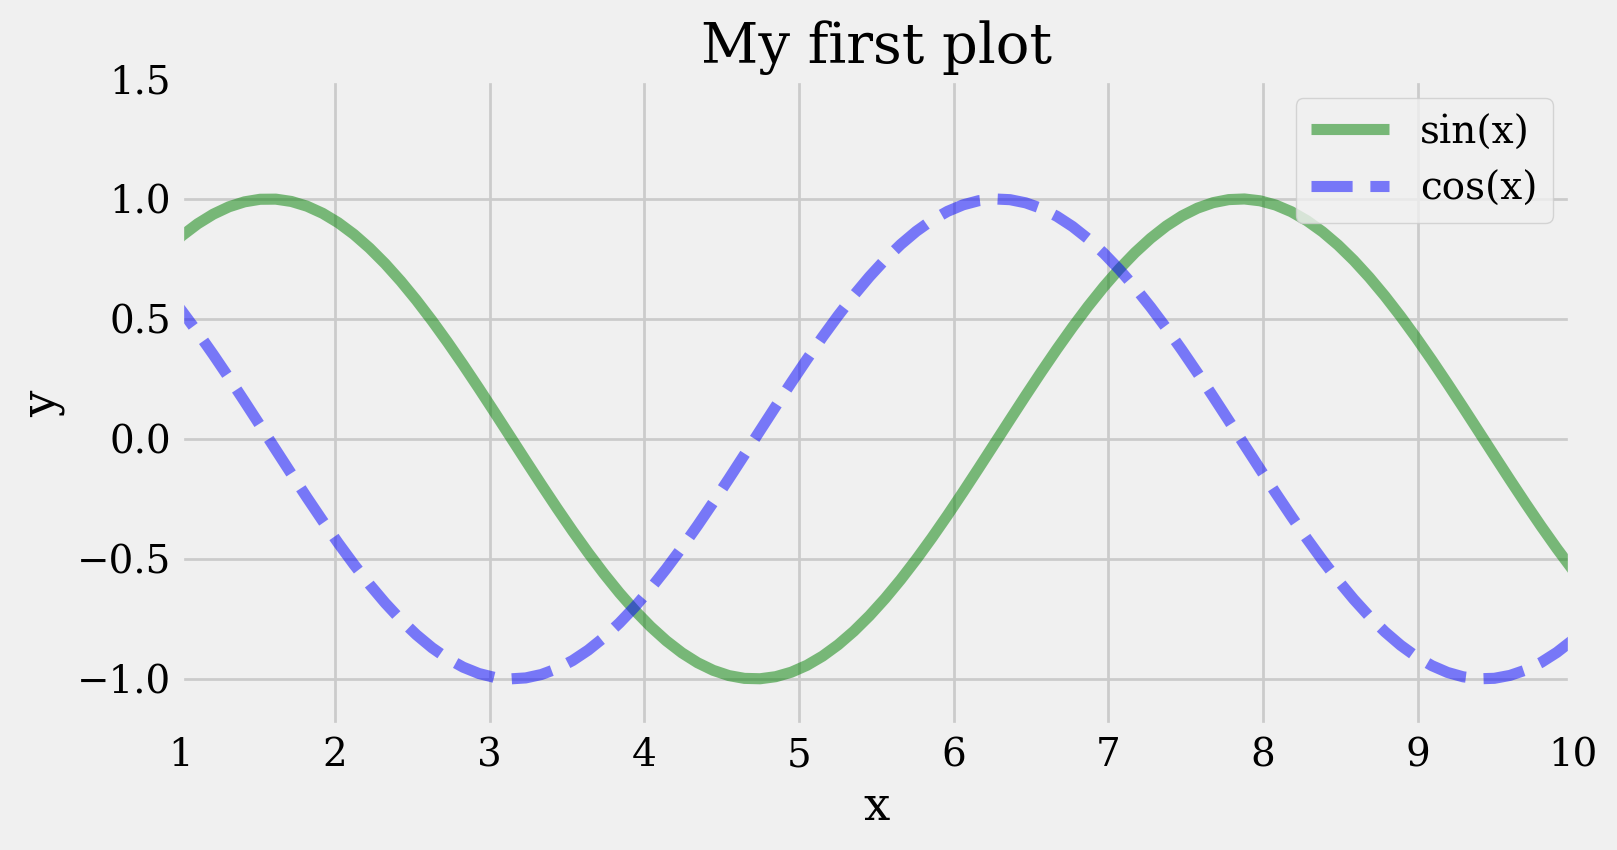

In [3]:
# If you like this one
plt.style.use('fivethirtyeight')
import numpy as np
x = np.linspace(0, 10, 100) # Create even grid from 0 to 10 with 100 points
#  On a side note；difference between "linspace" and "arange"
#  numpy.linspace(start, stop, num)：e.g.x = numpy.linspace(0, 10, 100)
#  numpy.arange(start, stop, step)： e.g.x = numpy.arange(0, 10, 10/100)
fig = plt.figure(figsize=(8,4)) # set size for figure
# two plots
plt.plot(x, np.sin(x), color='g', linestyle='-',  linewidth=4, alpha=0.5, label='sin(x)')
plt.plot(x, np.cos(x), color='b', linestyle='--',  linewidth=4, alpha=0.5, label='cos(x)')
#Plot the legends in the best location
plt.legend(loc='best')
# adjustments
plt.title('My first plot')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(1,10)
plt.ylim(-1.2,1.5);

### 1.4 The second plot
We will learn how to get time series data from the Federal Reserve Bank of St. Louis (FRED) and more about customizing of plot.

#### An example of a time series data description from "Fred"

| code | description |
|------|-------------|
|NAEXKP01CAQ189S |https://fred.stlouisfed.org/series/NAEXKP01CAQ189S|

 
#### GDP (NAEXKP01CAQ189S)

| Data Type         | Description                           |
|-------------------|--------------------------------------|
|Title:              |Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for Canada |
|Series ID:          |NAEXKP01CAQ189S                                |
|Source:             |Organization for Economic Co-operation and Development         |
|Release:            |Main Economic Indicators                  |
|Seasonal Adjustment:|Seasonally Adjusted Annual Rate       |
|Frequency:          |Quarterly                             |



                     GDP
DATE                    
2021-10-01  5.710642e+11
2022-01-01  5.765538e+11
2022-04-01  5.819702e+11
2022-07-01  5.846358e+11
2022-10-01  5.833768e+11


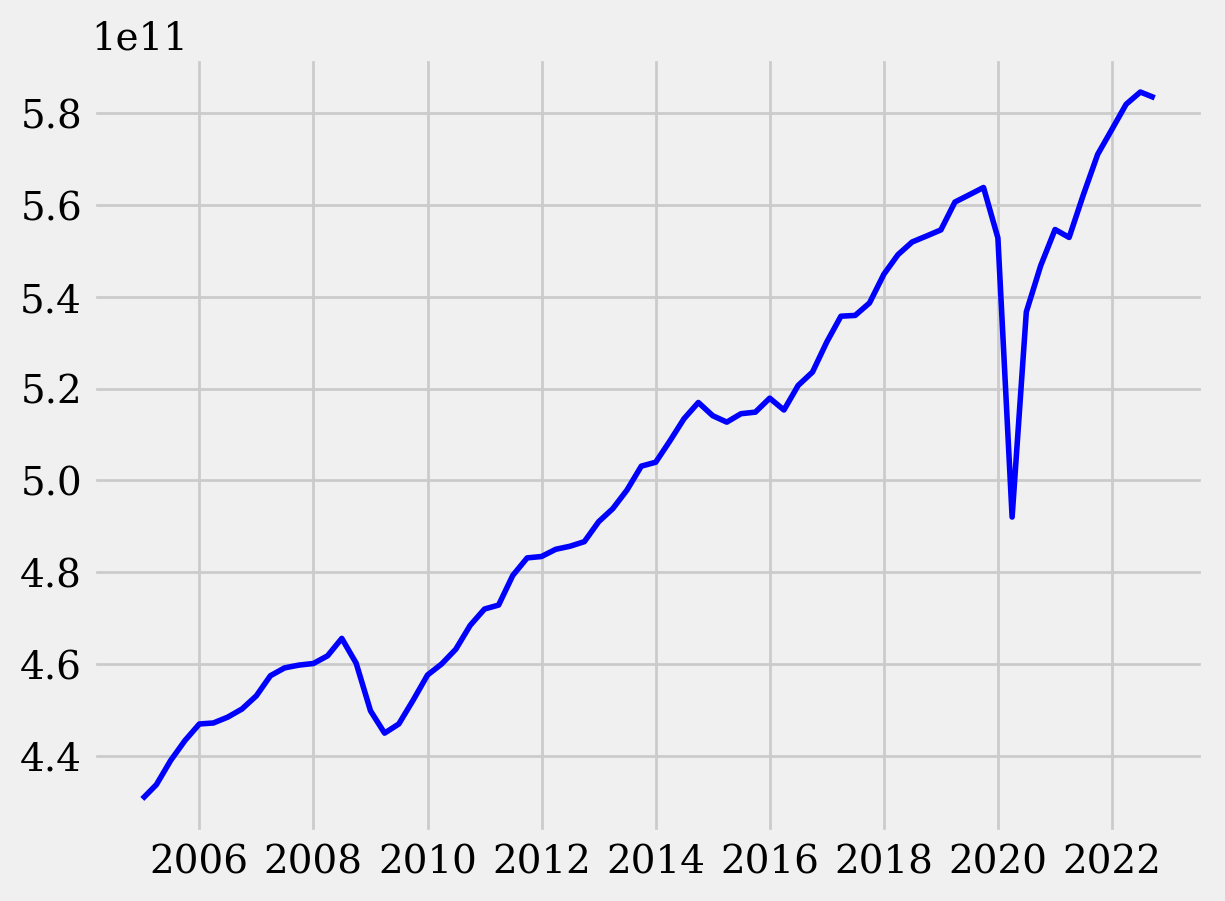

In [5]:
import pandas as pd
import pandas_datareader as pdr
import datetime
#setup up some date objects
start = datetime.datetime(2005, 1, 1)
end = datetime.datetime(2022, 12, 31)
# Use Pandas Web Reader to Fetch data from Fred#
gdp = pdr.data.DataReader("NAEXKP01CAQ189S", "fred", start, end)
# Rename the columns
gdp.rename(columns={'NAEXKP01CAQ189S':'GDP'},inplace=True)
#Preview the Data#
print(gdp.tail())
x=gdp.index
y=gdp
fig = plt.figure() # generate a canvas 
plt.plot(x,y, color = 'b', linestyle = '-', linewidth=2) ;

##### Adjusting the plot: axes limits & ticks

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control.
The most basic way to adjust axis limits is to use the ``plt.xlim()`` and ``plt.ylim()`` methods.

We also can explicitly determine where we want the axis ticks with `plt.xticks()` and `plt.yticks()`, which both take a list of values for where on the axis the ticks are to be placed.

##### Adjusting the plot: line colors and styles
The first adjustment you might wish to make to a plot is to control the line colors and styles.
The ``plt.plot()`` function takes additional arguments that can be used to specify these.
To adjust the color, you can use the ``color`` keyword, which accepts a string argument representing virtually any imaginable color.
The color can be specified in a variety of ways:

```ipython

plt.plot(x, y, color='blue')        # specify color by name
plt.plot(x, y, color='g')           # short color code (rgbcmyk)
plt.plot(x, y, color='0.75')        # Grayscale between 0 and 1
plt.plot(x, y, color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)

plt.plot(x, y, linestyle='solid')
plt.plot(x, y, linestyle='dashed')
plt.plot(x, y, linestyle='dashdot')
plt.plot(x, y, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, y, linestyle='-')  # solid
plt.plot(x, y, linestyle='--') # dashed
plt.plot(x, y, linestyle='-.') # dashdot
plt.plot(x, y, linestyle=':');  # dotted
```

##### Adjusting the plot: markers 

The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as ``'-'``, ``'--'`` to control the line style, the marker style has its own set of short string codes. The full list of available symbols can be seen in the documentation of ``plt.plot``, or in Matplotlib's online documentation. 

##### Labeling plots
Including titles, axis labels, and simple legends.

###### Legends
Plot legends give meaning to a visualization, assigning meaning to the various plot elements.
We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

The simplest legend can be created with the ``plt.legend()`` command, which automatically creates a legend for any labeled plot elements:

```ipython
legend(loc=0) # let matplotlib decide the optimal location (='best')
legend(loc=1) # upper right corner
legend(loc=2) # upper left corner
legend(loc=3) # lower left corner
legend(loc=4) # lower right corner
```

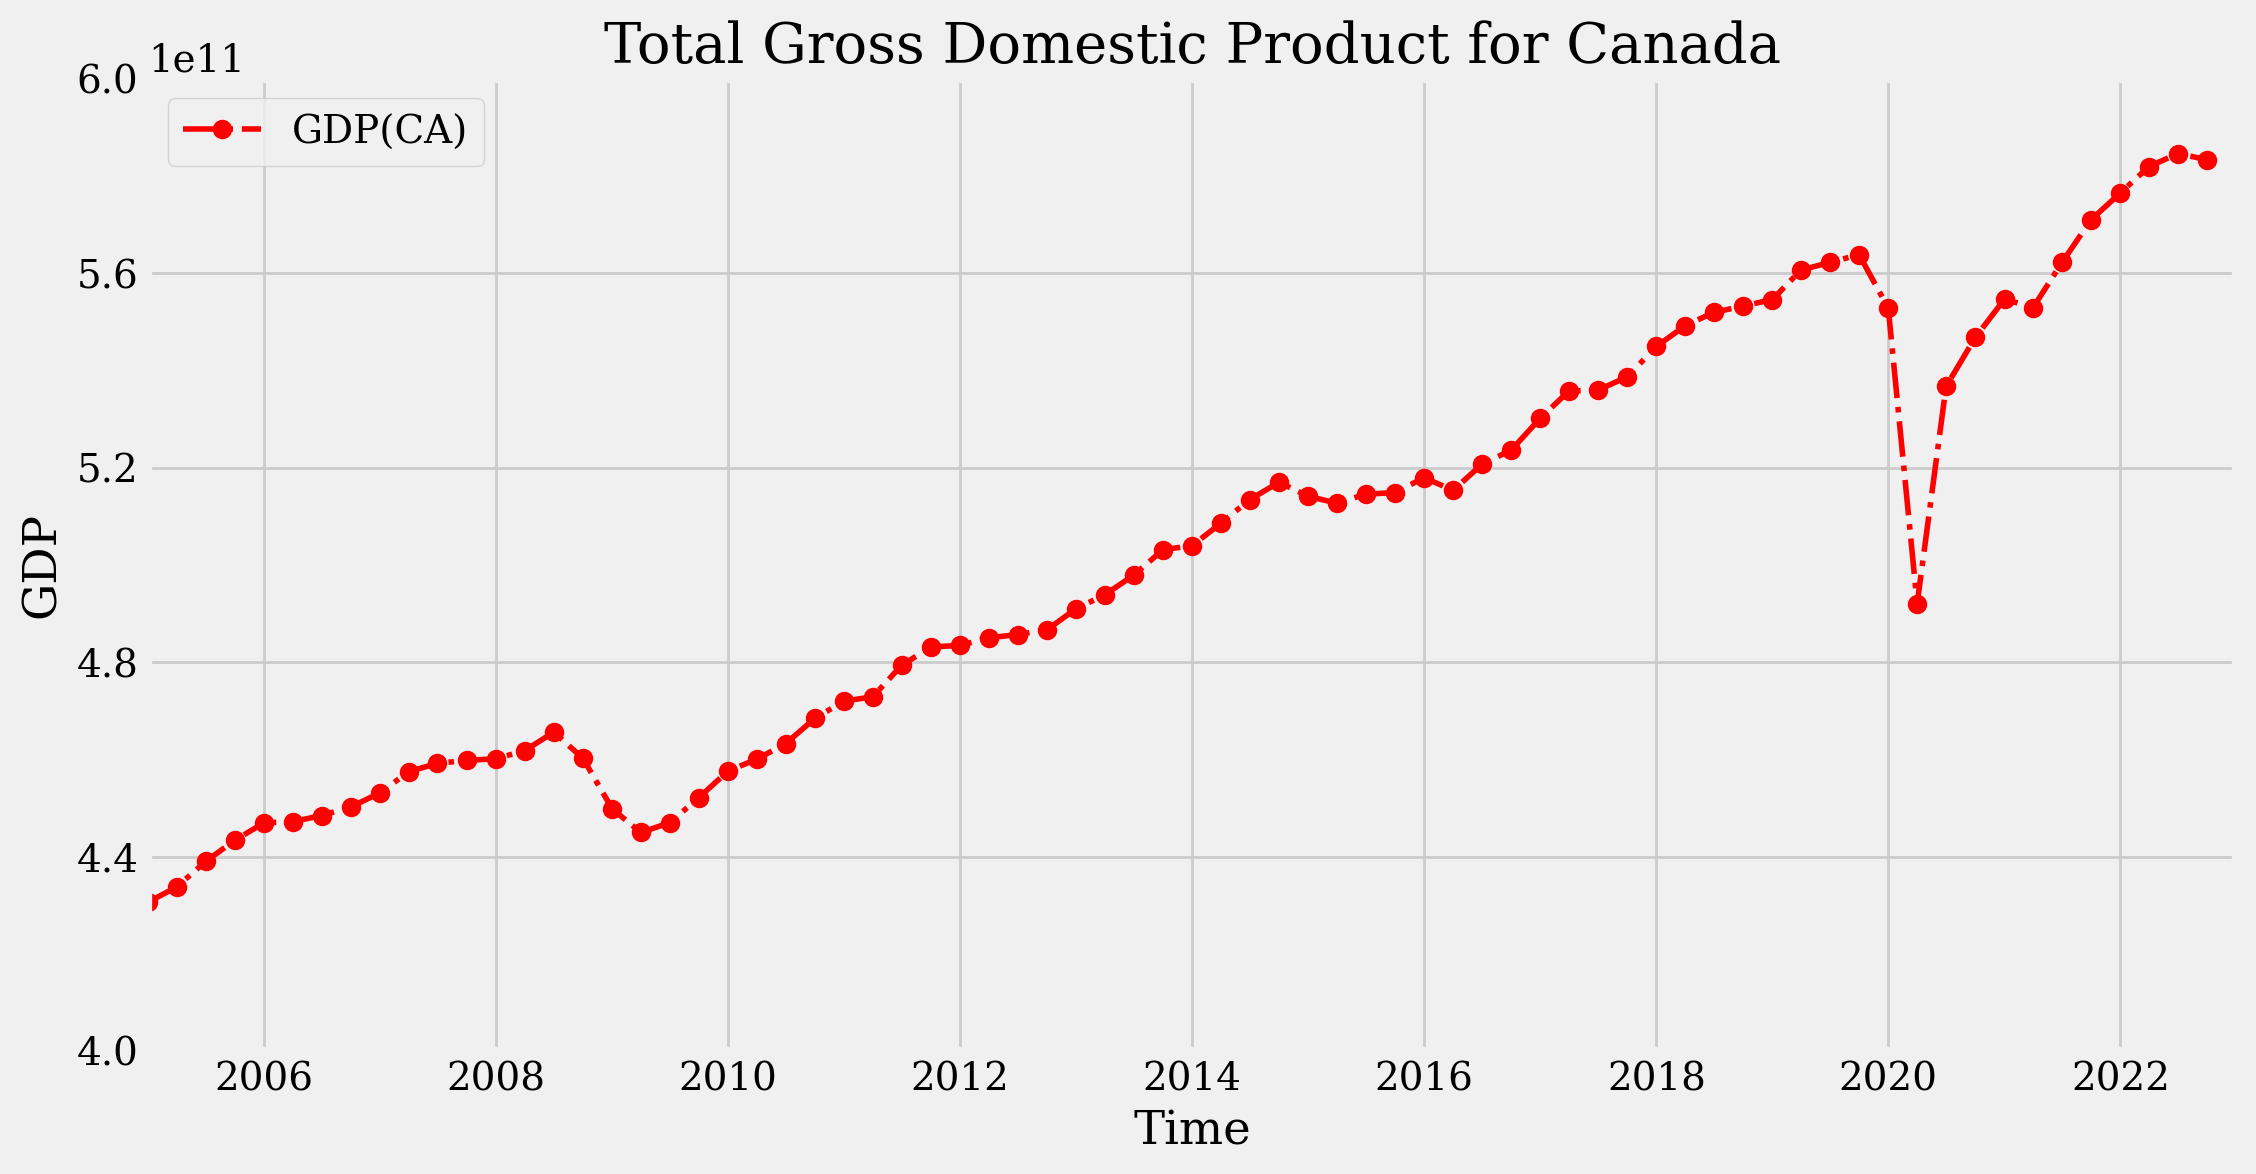

In [11]:
fig = plt.figure(figsize=(12,6)) # generate a canvas, set the size 
plt.plot(x,y, color = 'r', linestyle = '-.', linewidth=2, marker='o', label='GDP(CA)') 
plt.xlim(start, end)
plt.ylim(4e11, 6e11)

plt.yticks([4e11,4.4e11,4.8e11,5.2e11,5.6e11,6e11]);

plt.title("Total Gross Domestic Product for Canada")
plt.xlabel("Time")
plt.ylabel("GDP");

plt.legend(loc = 0);

##### Saving figures to a file

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the ``savefig()`` command.
For example, to save the previous figure as a PNG file, you can run this:

In [12]:
fig.savefig('ca_gdp.png')

In [12]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

### 1.5 The third plot:  plotting two time series data

In [13]:
#Use Pandas Web Reader to Fetch data from Fred#
gdp_index = pdr.data.DataReader("NAEXKP01CAQ661S", "fred", start, end)
# https://fred.stlouisfed.org/series/NAEXKP01CAQ661S

cpi = pdr.data.DataReader("CPALCY01CAQ661N", "fred", start, end)
# https://fred.stlouisfed.org/series/CPALCY01CAQ661N

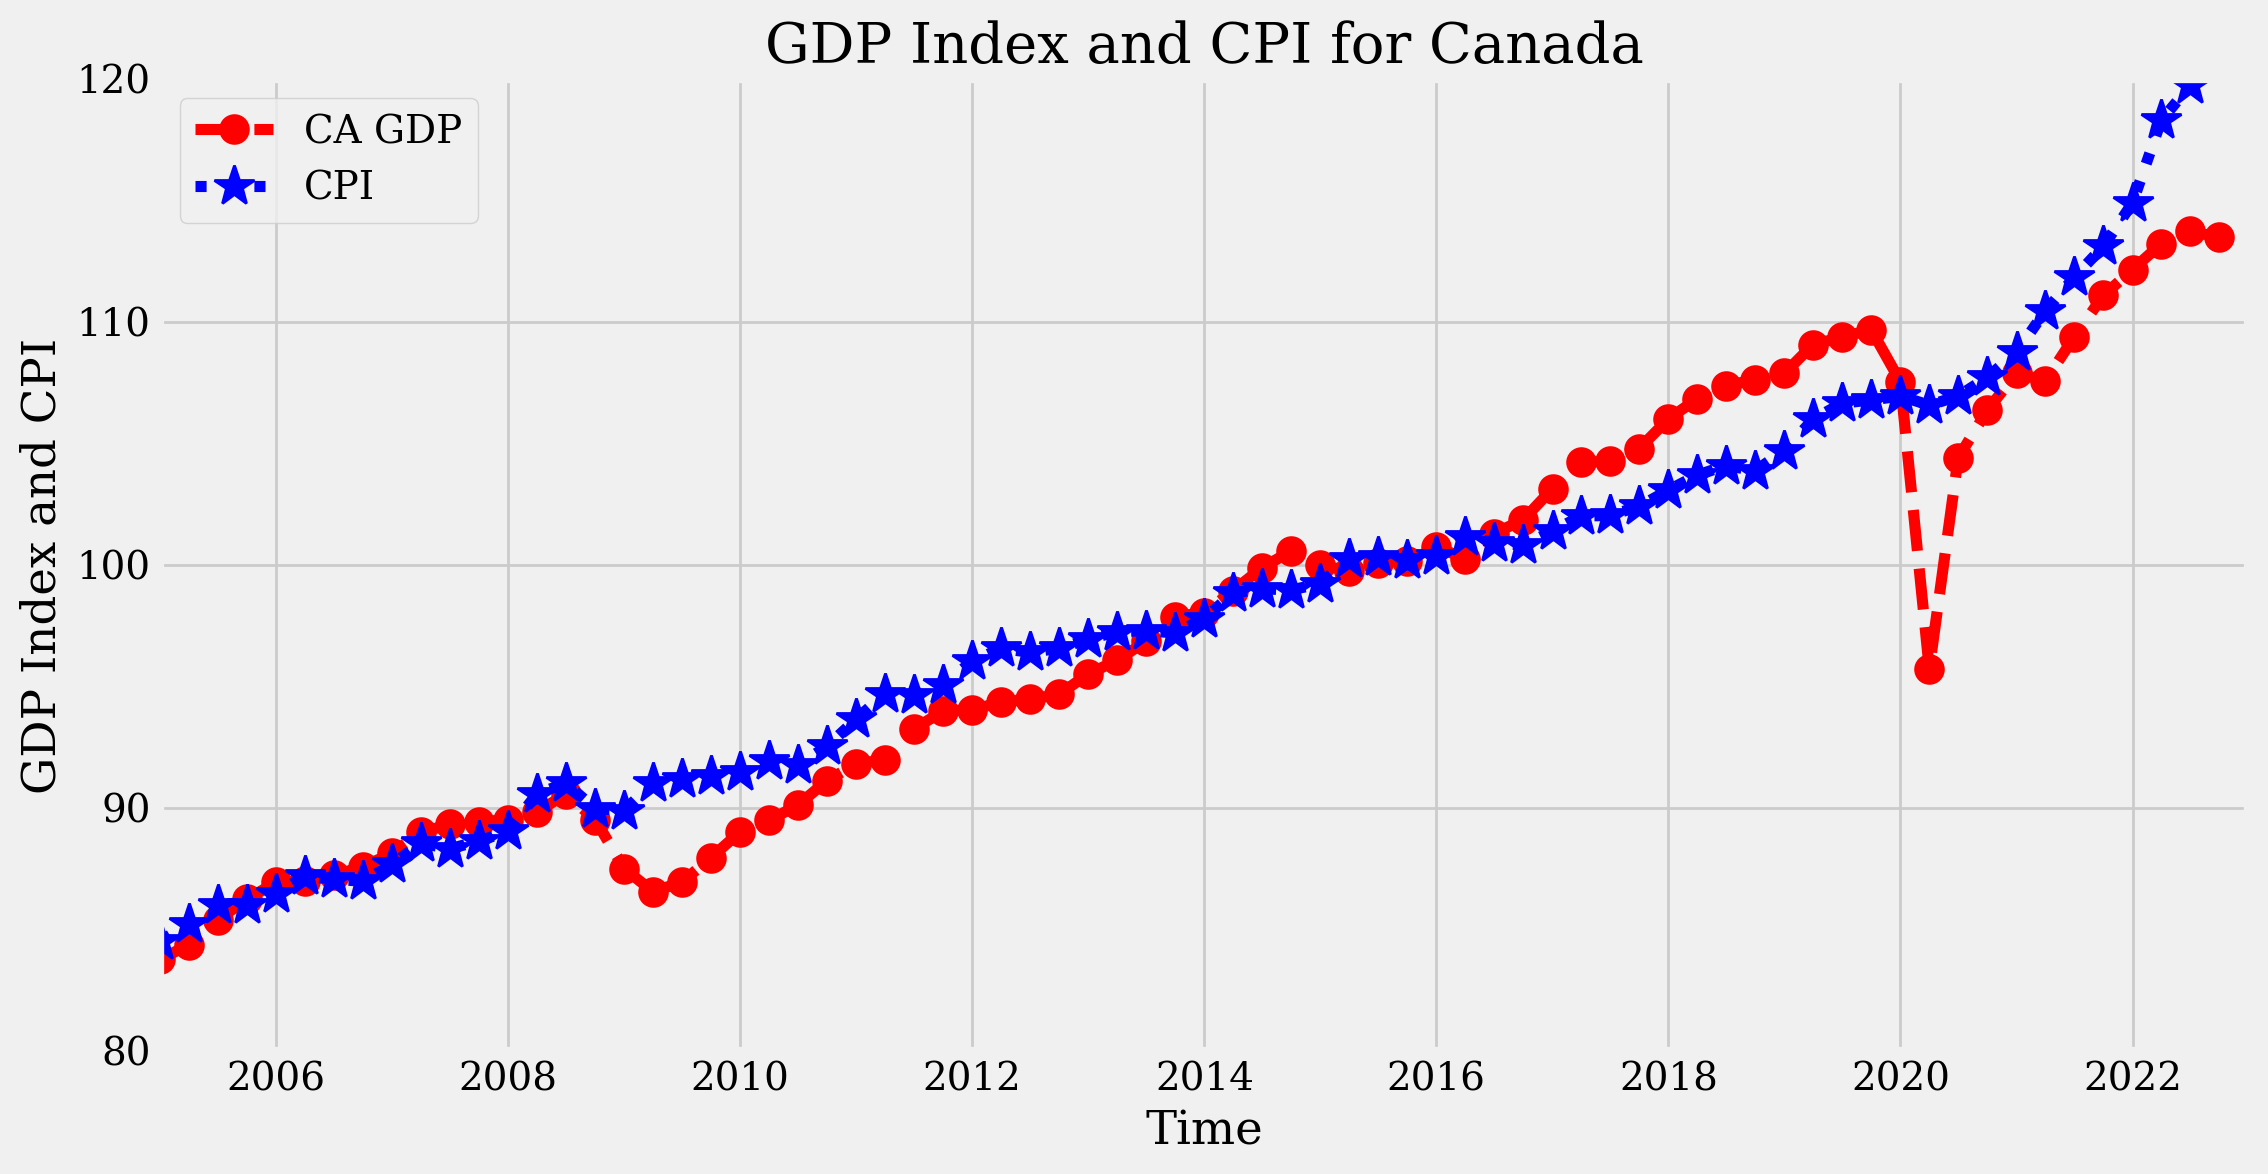

In [14]:
fig = plt.figure(figsize=(12,6)) # generate a canvas, set the size 
plt.plot(gdp_index.index,gdp_index, color = 'r', linestyle = '--', linewidth=4, 
         marker='o',markersize=10,label = "CA GDP") 
plt.plot(cpi.index,cpi, color = 'b', linestyle = ':', linewidth=4,
         marker='*',markersize=15,label = "CPI") 

plt.xlim(start, end)
plt.ylim(80, 120);
plt.yticks([80,90,100,110,120])

plt.title("GDP Index and CPI for Canada")
plt.xlabel("Time")
plt.ylabel("GDP Index and CPI");

plt.legend(loc = 0);

   
   
## Part 2. Resources for learning Python

### 2.1 Python Essentials (tutorials from DataCamp and PyFormat)

1. [Data type](https://www.datacamp.com/community/tutorials/data-structures-python)

2. [Import libraries](https://www.datacamp.com/community/tutorials/modules-in-python)

3. [Iterations](https://www.datacamp.com/community/tutorials/loops-python-tutorial)

4. [Functions](https://www.datacamp.com/community/tutorials/functions-python-tutorial)

5. [Print format](https://pyformat.info/)

### 2.2 Scientific Computing in Python (lecture notes from Robert Johansson and Scipy Lecture Notes)

1. [Introduction to Python programming](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-1-Introduction-to-Python-Programming.ipynb) 

2. [Numpy](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-2-Numpy.ipynb)

3. [Scipy](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-3-Scipy.ipynb)

4. [matplotlib](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb)

5. [Sympy](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-5-Sympy.ipynb)

6. [Scipy Lecture Notes](http://www.scipy-lectures.org/)

### 2.3 More tutorials & cheat sheets from DataCamp


1. [Python For Data Science - A Cheat Sheet For Beginners](https://www.datacamp.com/community/tutorials/python-data-science-cheat-sheet-basics)

2. [Matplotlib](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python) 

3. [SciPy Cheat Sheet: Linear Algebra in Python](https://www.datacamp.com/community/blog/python-scipy-cheat-sheet)

4. [NumPy Cheat Sheet: Data Analysis in Python](https://www.datacamp.com/community/blog/python-numpy-cheat-sheet)

5. [Pandas Cheat Sheet for Data Science in Python](https://www.datacamp.com/community/blog/python-pandas-cheat-sheet)





### 2.4 A reference book for data science in Python
  [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

# ECON457  Lab02

## Two parts: 
- More about plotting with Matplotlib: Multiple subplots & 3D and contour plots 
- Markdown Tutorial

## Part 1. More about plotting with Matplotlib 

In [ ]:
# convention
import numpy as np

In [ ]:
# For plotting
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from mpl_toolkits.mplot3d import Axes3D     #For 3D plotting
from matplotlib import cm   #colormap

%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # to render higher resolution images

### 1.1 Multiple subplots
Plot two panels in one figure.

In [ ]:
def survival(hazard,t):
    return np.e**(-hazard*t)
def cum_hazard(survival,hazard,t):
    y=survival(hazard,t)
    return -np.log(y)  

In [ ]:
x_grid = np.linspace(1,100,201)

#### 1.1.1 One way to specify the multiple panels

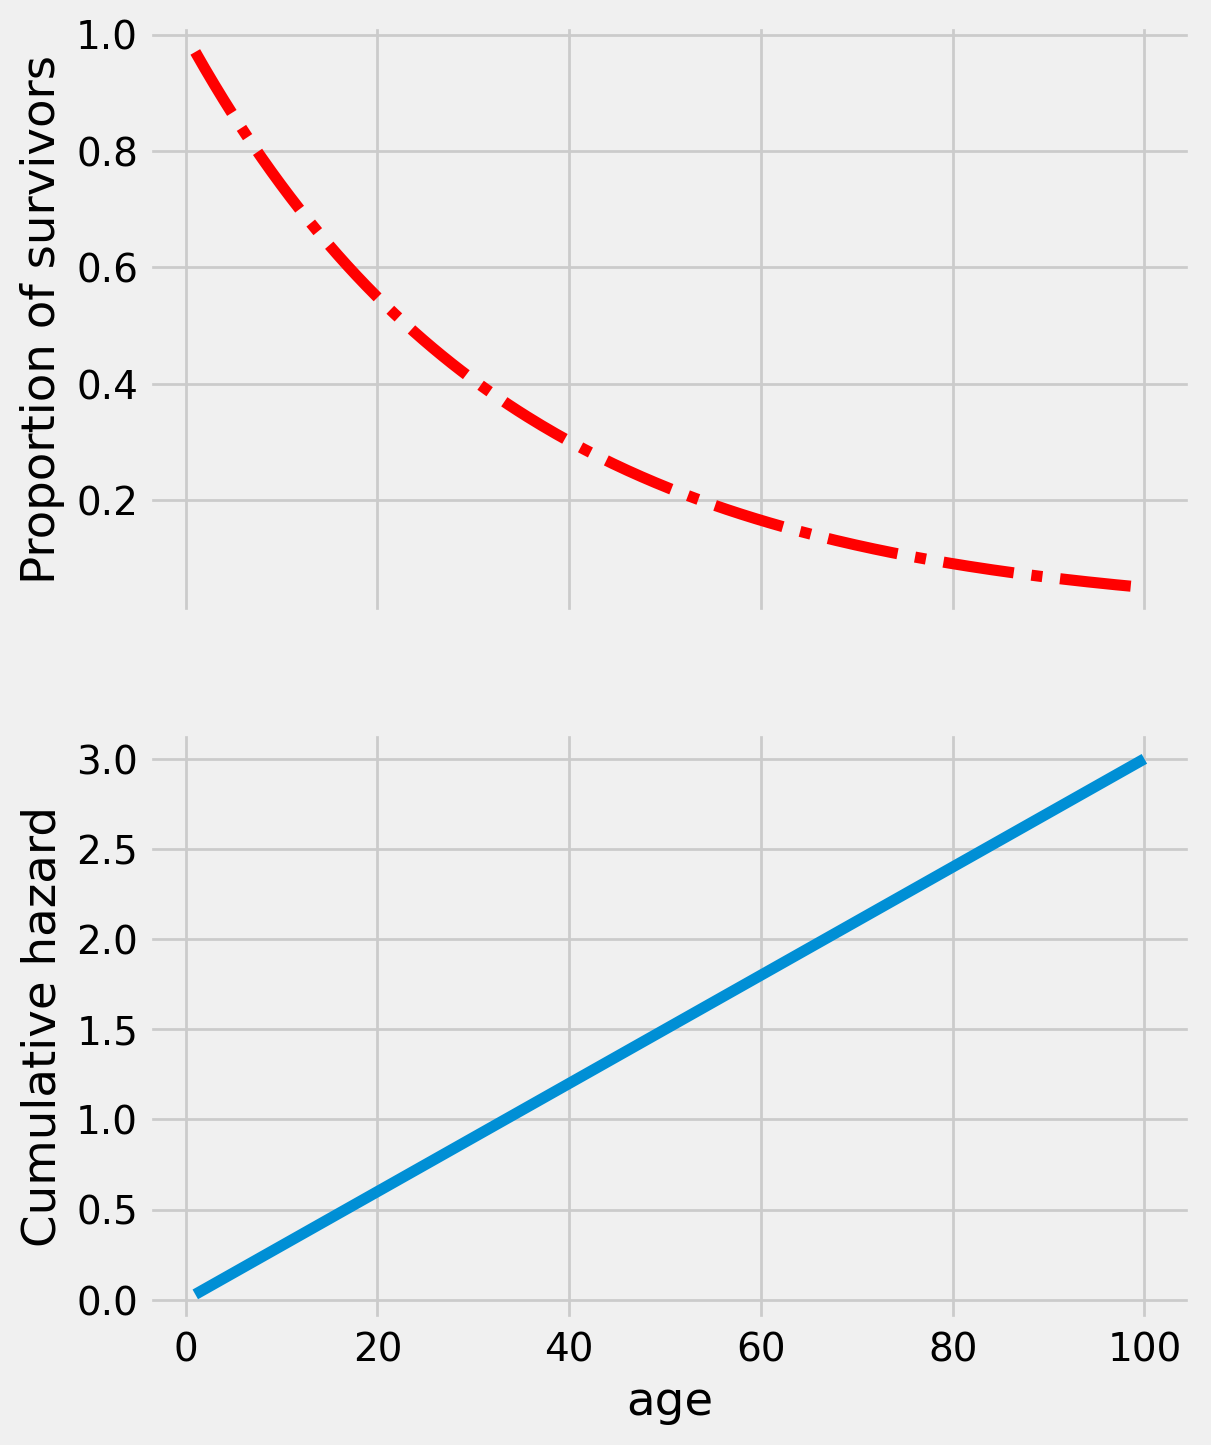

In [ ]:
fig, (ax1, ax2)  = plt.subplots(2,1, sharex= True,figsize = (6,8)) 
ax1.plot(x_grid, survival(0.03,x_grid),color='r',linestyle = "-.")
ax2.plot(x_grid, cum_hazard(survival,0.03,x_grid));
ax1.set_ylabel('Proportion of survivors')
ax2.set_xlabel('age')
ax2.set_ylabel('Cumulative hazard');

While most ``plt`` functions translate directly to ``ax`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``
- ``plt.xticks()`` →   `` ax.set_xticks([-4, 0, 4])``
- ``plt.yticks()`` →   ``ax.set_yticks([])``

#### 1.1.2 The other way to specify the multiple panels

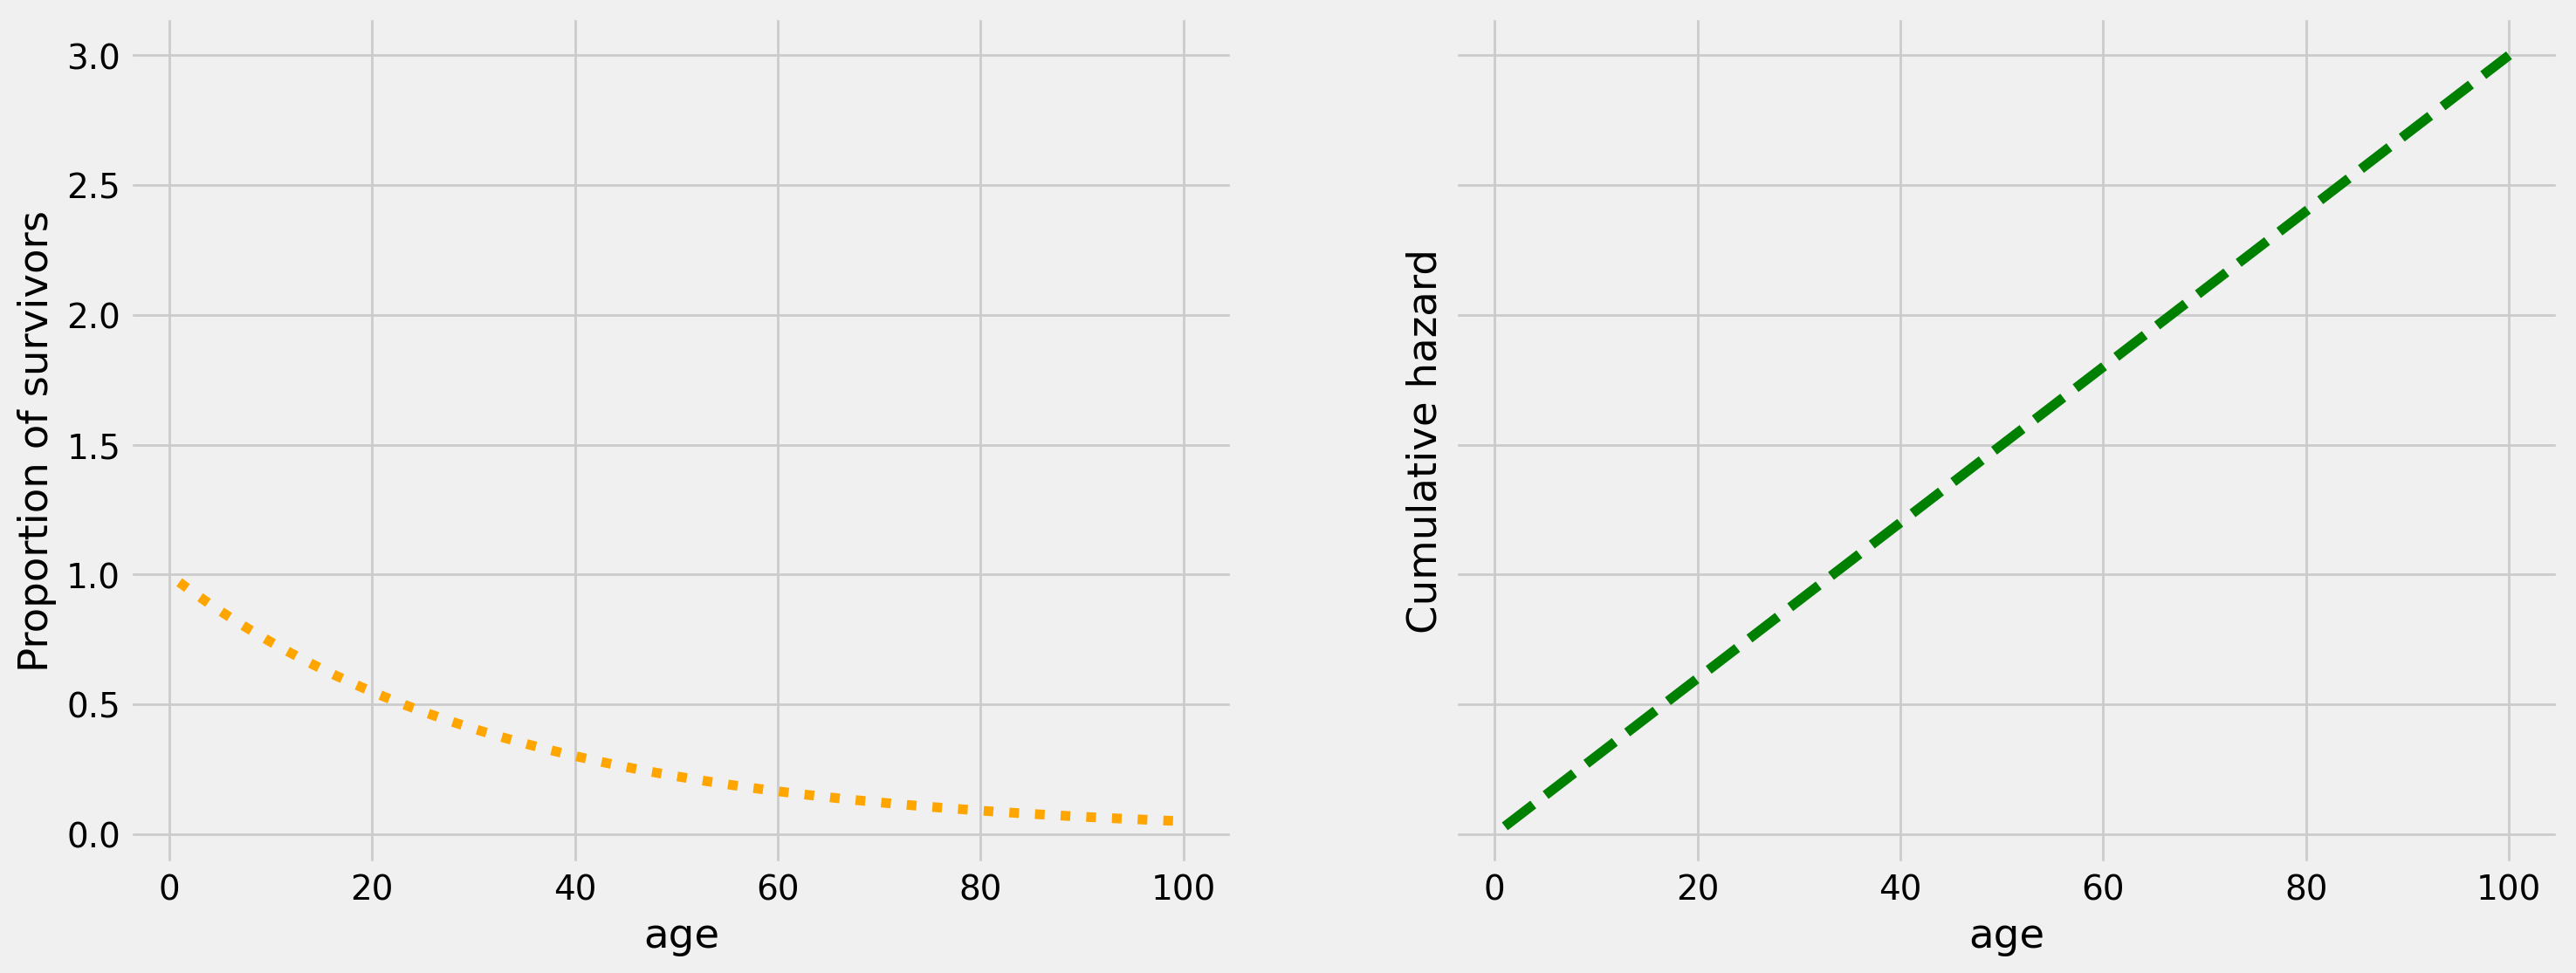

In [ ]:
fig, ax  = plt.subplots(1,2, sharey=True, figsize = (16,6)) 
ax[0].plot(x_grid, survival(0.03,x_grid),color='orange',linestyle = ':',linewidth=4)
ax[1].plot(x_grid, cum_hazard(survival,0.03,x_grid),linestyle='--',linewidth=4,color='g')
ax[0].set_ylabel('Proportion of survivors')
ax[0].set_xlabel('age')
ax[1].set_xlabel('age')
ax[1].set_ylabel('Cumulative hazard');

### 1.2 Contour Plots

Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions.
There are two Matplotlib functions that can be helpful for this task: ``plt.contour`` for contour plots, ``plt.contourf`` for filled contour plots. Before plotting contour plots, we'll start by demonstrating a 3D plot using a function $ f(x,y) = x^{0.25} y^{0.25},x,y \geq 0 $. You might think this as a canonical Cobb-Douglas utility function. 

In [ ]:
def f(x, y):
    return x ** 0.25*y **0.25

In [ ]:
x = np.linspace(0.1, 5, 50)
y = np.linspace(0.1, 5, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

#### 1.2.1 A 3D surface plot
To create a 3D axes, we need to pass the argument projection='3d'.

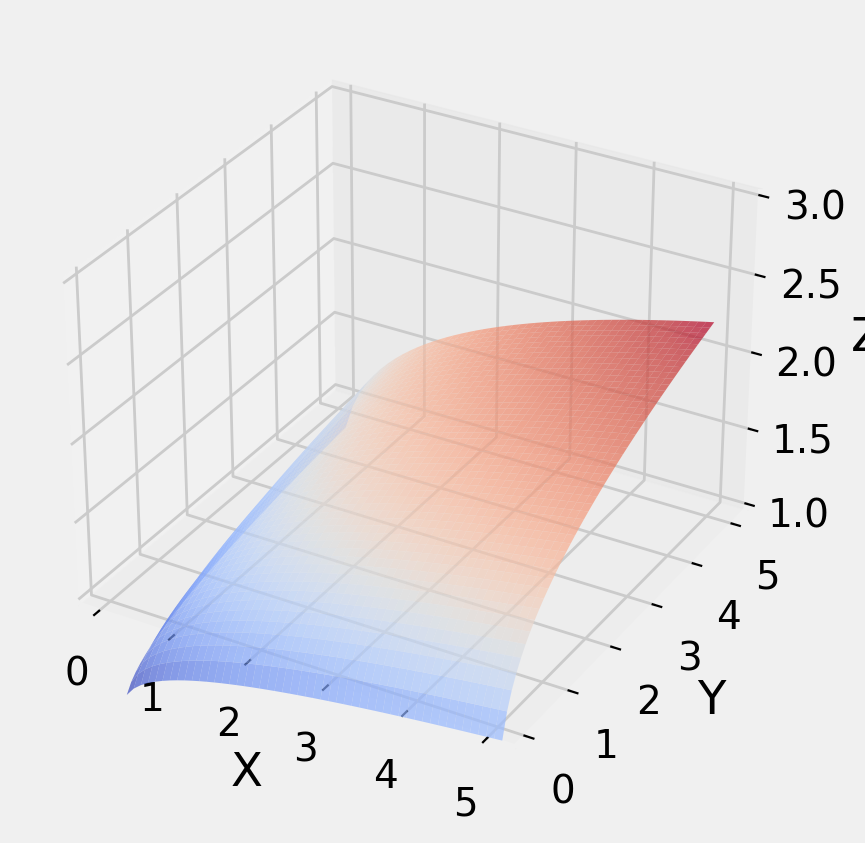

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

#ax.contour3D(X, Y, Z, 50, cmap='binary', alpha=0.3)
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,alpha=0.7)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_zlim(1,3)

#ax.view_init(30, -120)

plt.show()


#### 1.2.2 Contour plots

##### Line-only contour plot
Now let's look at this with a standard line-only contour plot:

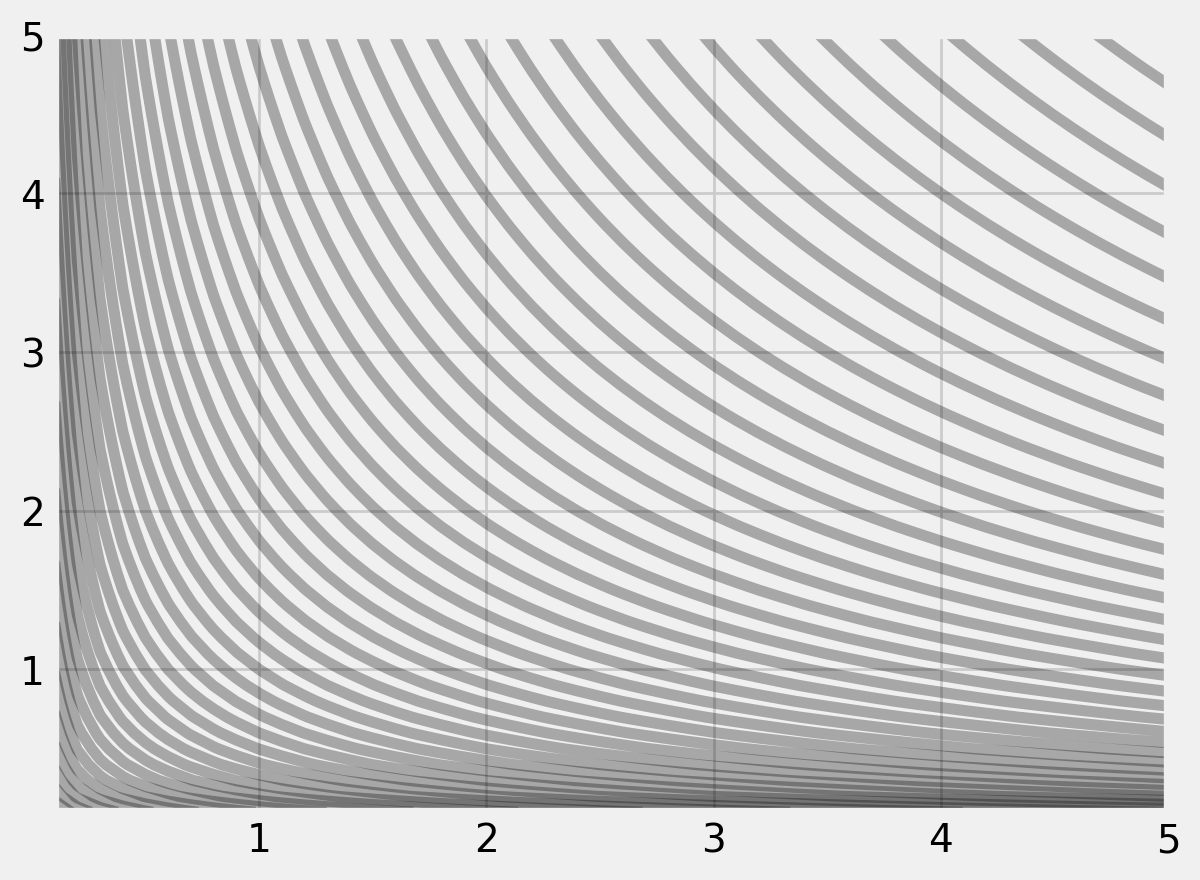

In [ ]:
plt.contour(X, Y, Z, 50, colors='black', alpha=0.3);


##### Filled contour plot
The above plot looks nicer, but the spaces between the lines may be a bit distracting.

We can change this by switching to a filled contour plot using the ``plt.contourf()`` function (notice the ``f`` at the end), which uses largely the same syntax as ``plt.contour()``.

Matplotlib has a wide range of colormaps available, which you can easily browse in IPython by doing a tab completion on the ``plt.cm`` module or the ``cm`` module if you have imported the ``cm`` module.
```
plt.cm.<TAB>
cm.<TAB>
```
Additionally, we'll add a ``plt.colorbar()`` command, which automatically creates an additional axis with labeled color information for the plot. The colorbar makes it clear that the red regions are "peaks," while the blue regions are "valleys."

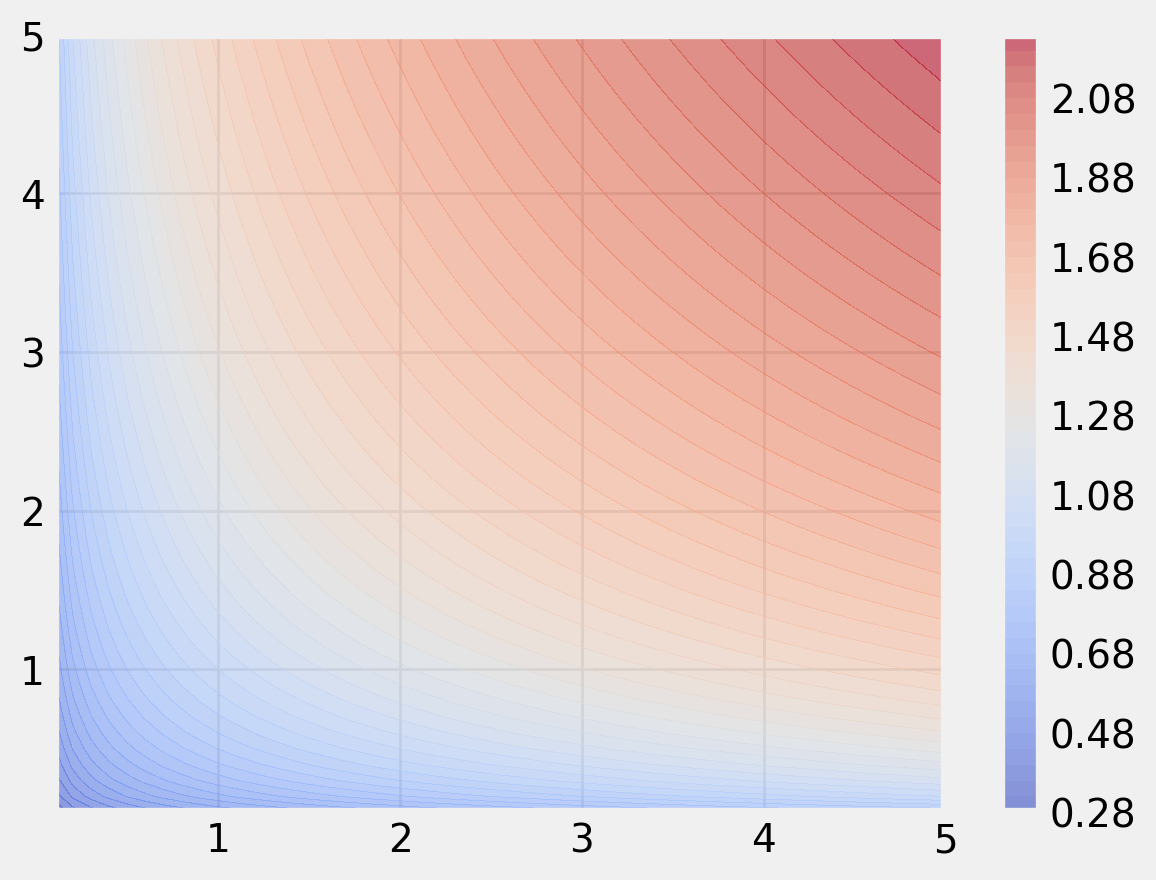

In [ ]:
plt.contourf(X, Y, Z, 50, cmap=cm.coolwarm, alpha=0.6)
plt.colorbar()


##### Add labels to line contours


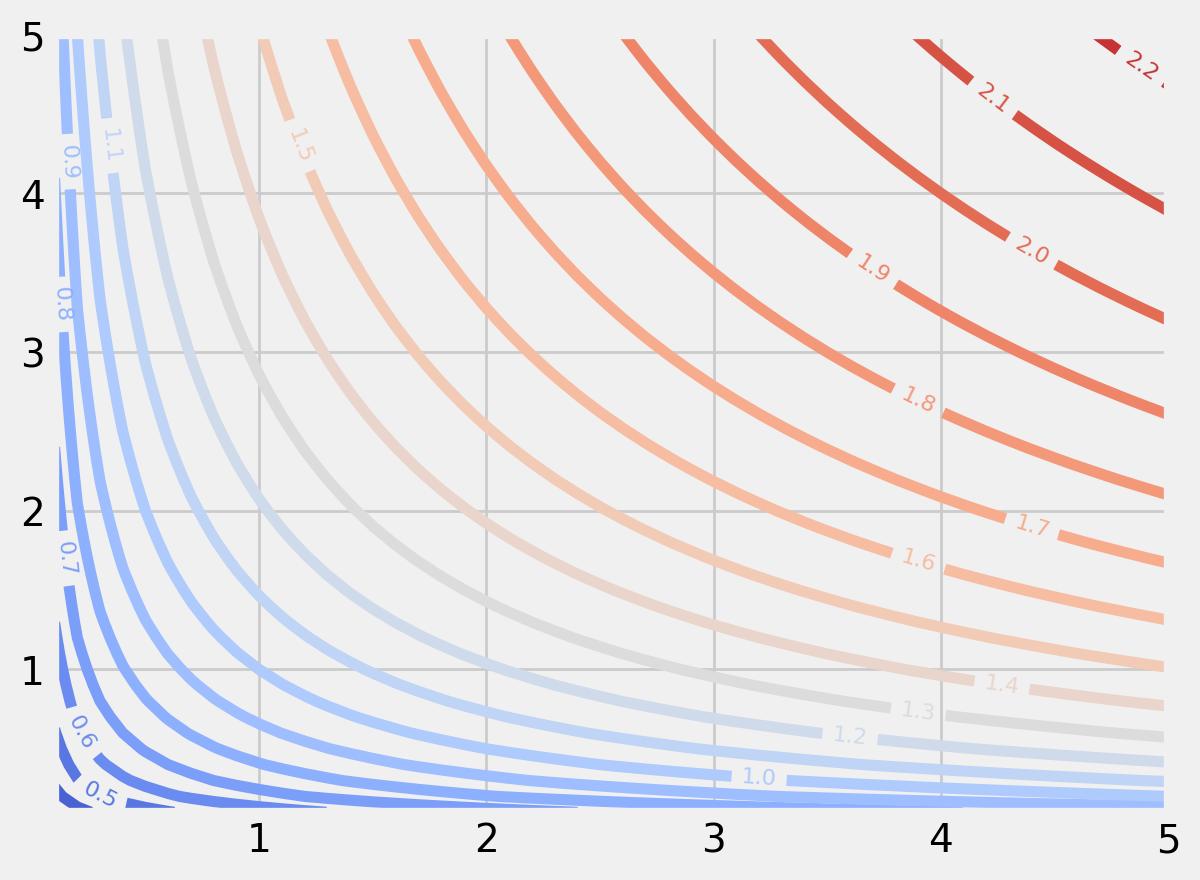

In [ ]:
contours = plt.contour(X, Y, Z, 20,cmap=cm.coolwarm)
plt.clabel(contours, inline=True, fontsize=8);



## Part 2. Markdown Tutorial

### 2.1 Markdown Cells

Cells that contain text are called "markdown" cells. To make a cell into a markdown cell, choose the option "Markdown" from the drop down menu on the tool bar above. 

Markdown cells are run in the same way as code cells: by pressing ```shift + enter```. Once a markdown cell has been run, it appears as plain text. To edit a markdown cell, double click on it.


### 2.2 Headings
Markdown cells can contain headings and subheadings to keep writing organized. To create a heading, type from one to six ```#```s at the beginning of a line followed by a space and the name of your heading. Jupyter will automatically change the font size of the heading and turn it blue for visability. 

Markdown has 6 different levels of headings. Below are some examples of different headings. The cell below contains the largest of these headings. Double click on this cell see how these different were created.

```
# Heading 1
## Heading 2
##### Heading 5
```

# Heading 1
## Heading 2
### Heading 3
##### Heading 5

### 2.3 Emphasis: 


- Bold:
```
    __string__ or **string** 
```

 gives
 
 __string__ or **string** 
 
 
- Italic: 

```
    _string_ or *string*
```

gives

_string_ or *string*


### 2.4 LaTeX
To embed LaTeX formatting in a markdown cell, surround the command with either ```$``` or ```$$```. The single dollar sign puts it inline witht the text, the the double dollar sign centers it below the text. Here is an example of a centered LaTeX command:

$$F(x) = \int_{0}^{\infty} e^{-x} dx$$


See more at http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Typesetting%20Math%20Using%20MathJax.ipynb

### 2.5 Use Markdown for Easy Table

https://www.tablesgenerator.com/markdown_tables

| e\eta  | 1 |  3 |
|---|---|---|
|  -2 | 1.26, 1.26  | 1.15, 1.51  |
|  -0.5 |  1.59, 1.59 | 1.22, 1.81  |


#### Remember to use commas to separate the numbers in one cell because the additional space does not work in table in Markdown.

| a  |  1 |2   |
|---|---|---|
| 1  | 1.1 1.2  | 2.1 2.2  |
| 2  | 3.2 2.2  | 2.1   2.2  |